In [2]:
import pandas as pd
import numpy as np
from pyquaternion import Quaternion

import matplotlib.pyplot as plt

In [11]:
result_nn = np.loadtxt('runtime_result.txt')
result_voc = np.loadtxt('runtime_result_voc.txt')
result_voc = np.delete(result_voc,16,axis=0)
result_voc = np.delete(result_voc,15,axis=0)

# 1. Result distance

In [12]:
def difference_quaternion(q1, q2):
    delta_q = q1 * q2.inverse
    return delta_q.angle

def difference_position(p1, p2):
    delta = 0
    for i in range(3):
        delta += (p1[i] - p2[i]) * (p1[i] - p2[i])
    return np.sqrt(delta)

In [13]:
quaternion_nn = result_nn[:,0:4]
quaternion_voc = result_voc[:,0:4]
delta_quaterion = np.zeros(len(quaternion_nn))
for i in range(len(quaternion_nn)):
    q1 = Quaternion(quaternion_nn[i])
    q2 = Quaternion(quaternion_voc[i])
    delta_quaterion[i] = difference_quaternion(q1, q2)

position_nn = result_nn[:,4:7]
position_voc = result_voc[:,4:7]
delta_position = np.zeros(len(quaternion_nn))
for i in range(len(quaternion_nn)):
    delta_position[i] = difference_position(position_nn[i], position_voc[i])

Text(0.5, 1.0, 'delta score')

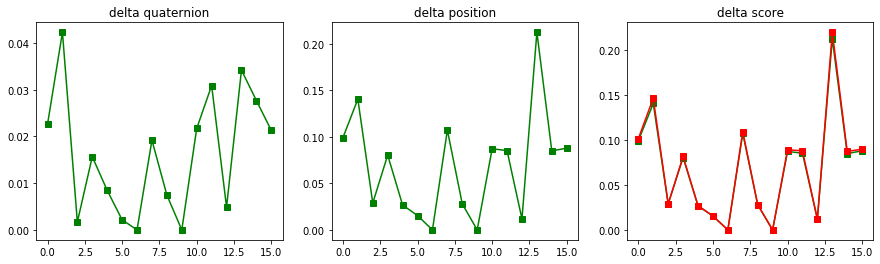

In [14]:
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.plot(delta_quaterion,'g-s')
plt.title("delta quaternion")

plt.subplot(1,3,2)
plt.plot(delta_position,'g-s') 
plt.title("delta position")

plt.subplot(1,3,3)
delta_score = delta_position * (1 + np.sin(delta_quaterion))
plt.plot(delta_position,'g-s') 
plt.plot(delta_score,'r-s')
plt.title("delta score")

In [15]:
print(" The average delta position is :",np.average(delta_position))
print(" The average delta quaterion is :",np.average(delta_quaterion))

 The average delta position is : 0.06856510073926717
 The average delta quaterion is : 0.01626753312054613


There is small change appear to the pose result, while we have no groud truth to tell which results are better.

# 2. Run Time

In [16]:
time_nn = result_nn[:,7:]
time_voc = result_voc[:,7:]

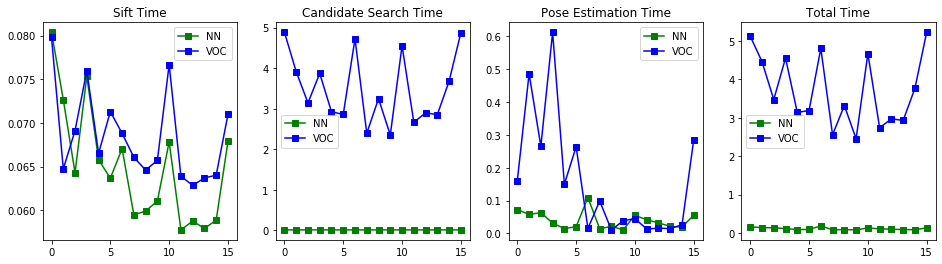

In [17]:
plt.figure(figsize = (16,4))
num_plot = time_nn.shape[1]
titles = ["Sift Time", "Candidate Search Time", "Pose Estimation Time", "Total Time"]
for i in range(num_plot):
    plt.subplot(1,num_plot,i+1)
    plt.plot(time_nn[:,i],'g-s', label = "NN")
    plt.plot(time_voc[:,i],'b-s', label = "VOC")
    plt.title(titles[i])
    plt.legend()

In [18]:
print(" The average time used for NN method is :",np.average(time_nn[:,-1]))
print(" The average time used for original method is :",np.average(time_voc[:,-1]))

 The average time used for NN method is : 0.111947625
 The average time used for original method is : 3.7142594375
